# Sistemas

Sinais são processados por sistemas, ou seja, um sistema é  alimentado por um ou mais sinais de entrada , realiza o processamento e e libera como resultado um ou mais sinais de saída. Um típico sistema é o circuito elétrico. A entrada é definida como a fonte de alimentação, e a saída pode ser definida como a tensão sobre o resistor.  No script abaixo, usamos o pacote computacional Lcapy para definir, desenhar e analisar um circuito $RC$ simples.

In [1]:
#!pip install lcapy
from lcapy import Circuit,t


In [2]:
cct = Circuit("""
Vi 1 0_1 step; down
C 1 2; right=1.5
R 2 0; down
W 0_1 0; right
W 0 0_2; right=0.5
P1 2_2 0_2; down
W 2 2_2;right=0.5""")

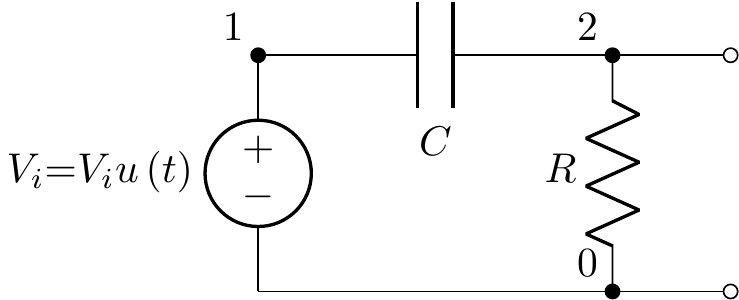

In [3]:
cct.draw()

A equação de malha é achada diretamente com os comandos abaixo:

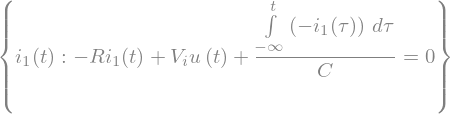

In [4]:
l=cct.mesh_analysis()
l.mesh_equations()

A tensão sobre o resistor (entre os nós 2 e 0) é achada como segue:

In [5]:
cct.R.V(t)

    -t      
    ───     
    C⋅R     
Vᵢ⋅ℯ   ⋅u(t)

## Classificação de Sistemas

* Sistemas lineares e não lineares
* Sistemas invariantes ou variantes no tempo
* Sistemas causais ou não causais
* Sistemas contínuos ou discretos no tempo
* Sistemas analógicos ou digitais

### Sistemas Lineares

Para um sistema ser linear ele deve satisfazer duas propriedades: aditividade e homogeneidade.

#### Aditividade
Quando duas ou mais entradas estão atuando em um sistema linear, a saída equivale a soma das saídas resultantes se cada entrada atuasse isoladamente no sistema.  Ou seja, caso tenhamos duas entradas $x_1$ e $x_2$, sendo que  $y_1$ e $y_2$ são as respectivas saídas quando as entradas atuam isoladamente, então a aditividade é satisfeita quando
$$x_1+x_2 \rightarrow y_1+y_2$$

#### Homogeneidade
Se a para uma determinada entrada $x$ temos uma saída $y$, ou seja $x \rightarrow y$, então se $x$ é multiplicada por número  qualquer $k$, teremos na saída

$$kx\rightarrow ky.$$

Circuitos elétricos com redes passivas são exemplo de circuitos lineares. Em um circuito com duas fontes normalmente se utiliza da superposição onde a resposta é calculada para cada fonte isoladamente, curto circuitando-se a outra, e somando-se as respostas obtidas. Isso nada mais é que a aplicação do conceito de aditividade. 

Um exemplo simples de sistema não linear é aquele cuja saída é dada pelo quadrado da entrada, ou seja, $x \rightarrow x^2$. Neste caso, havendo duas entradas tais que $x_1 \rightarrow y_1=x_1^2$ e $ x_2 \rightarrow y_2=x_2^2$, para uma entrada $x_1+ x_2$ teremos na saída  

$$ x_1+ x_2 \rightarrow (x_1+x_2)^2=x_1^2 +x_2^2 +2x_1x_2 \ne y_1+y_2$$.

Esta situação ocorre circuitos envolvendo elementos semicondutores como diodos, por exemplo.

### Sistemas Invariantes e  Variantes no Tempo

Sistemas com parâmetros constantes no tempo sao invariantes no tempo. em tais sistemas, se uma entrada $x(t)$ sofrer um atraso de $T$ segundos, o mesmo ocorrerá com a saída, ou seja, a saída permanece a mesma mas também atrasada por $T$ segundos,

$$x(t+T)\rightarrow y(t+T)$$

Caso a saída não seja uma cópia atrasada da entrada, então o sistema é variante no tempo.

### Sistemas Causais e Não Causais

Em um sistema causal a saída depende exclusivamente da entrada $x(t)$ par $t \ge t_0$, onde $t_0$ é algum instante de tempo específico. Em um sistema não causal a saída presente no sistema depende também da entrada futura. Um exemplo de sistema não causal é um filtro ideal retangular no domínio da frequência. Este filtro remove completamente quaisquer componentes do sinal de entrada com frequência maior que uma frequência $f_0$, denominhada frequência de corte, enquanto componentntes com frequências menores são encaminhadas para saída sem sofrer alterações de amplitude. No domínio do tempo, o filtro é descrito pela função sinc($x$) $= \frac{\sin(x)}{x}$, que é a resposta ao impulso ocorrendo em $t=0$ (ver figura abaixo). Note que a resposta ocorre antes da entrada no instante $t=0$.




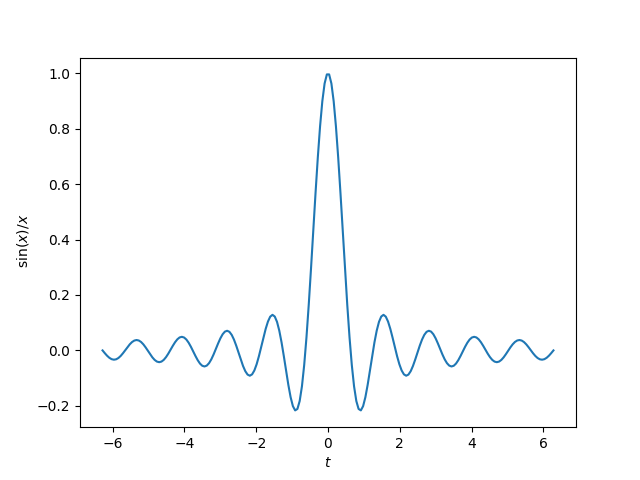

###  Sistemas em Tempo Contínuo e Tempo Discreto. 
Sinais em tempo contínuo e tempo discreto foram mostrados no notebook anterior sobre sinais. Sistemas cujas entradas e saídas são sinais contínuos no tempo são sistemas contínuos, assim como sistemas cujas entrada e saídas sejam discretos no tempo são sistemas de tempo discreto. Um computador digital é um sistema de tempo discreto.


### Sistemas Analógicos e Digitais 

Sinais analógicos e digitais foram vistos no notebook anterior. Um sistema cujos sinais de entrada e saída sejam analógicos é um sistema analógico. Um amplificador de áudio analógico é um sistema deste tipo. Se os sinais de entrada e saída são digitais, entao o sistema é digital. Um computador digital é um sistema digital.

## Modelo Entrada-Saída de um Sistema Linear

Vamos retomar a equação de malha do circuito $RC$ acima:


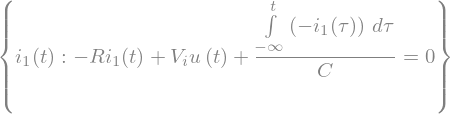

In [6]:
l=cct.mesh_analysis()
l.mesh_equations()

Para simplificar o processo de solução deste circuito, iremos utilizar o operador diferencial $D$ para $\frac{d}{dt}$ nas equações diferenciais que descrevem o sistema dado.
$$ D=\frac{d}{dt}$$
$$ D^2=\frac{d^2}{dt^2}$$
$$ \frac{1}{D}=\int_{-\infty}^{0}  \,dt$$

Assim, a equação de malha pode ser escrita como:

$$ Ri_1(t)+\frac{1}{CD}i_1(t)=V_iu(t)$$

Derivar a equação uma segunda vez em relação ao tempo equivale a multiplicá-la por D. Com isso elimina-se a integração. 

$$ DRi_1(t)+\frac{1}{C}i_1(t)=DV_iu(t)$$
$$ (DR+\frac{1}{C})i_1(t)=DV_iu(t) $$